In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
x_train = x_train.reshape([-1, 28*28]) / 255
x_test = x_test.reshape([-1, 28*28]) / 255

In [11]:
def create_model(init):
    model = Sequential()
    model.add(Dense(100, input_shape=(28*28,), kernel_initializer=init, activation='tanh'))
    model.add(Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))
    return model

In [12]:
uniform_model = create_model("uniform")
uniform_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = uniform_model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 18us/step - loss: 2.3010 - accuracy: 0.1116 - val_loss: 2.2994 - val_accuracy: 0.1135
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 2.2980 - accuracy: 0.1124 - val_loss: 2.2958 - val_accuracy: 0.1135
Epoch 3/30
60000/60000 [==============================] - 2s 28us/step - loss: 2.2912 - accuracy: 0.1156 - val_loss: 2.2815 - val_accuracy: 0.1546
Epoch 4/30
60000/60000 [==============================] - 1s 18us/step - loss: 2.1504 - accuracy: 0.2427 - val_loss: 1.8376 - val_accuracy: 0.2992
Epoch 5/30
60000/60000 [==============================] - 2s 30us/step - loss: 1.4588 - accuracy: 0.4531 - val_loss: 1.0249 - val_accuracy: 0.6259
Epoch 6/30
60000/60000 [==============================] - 2s 25us/step - loss: 0.8725 - accuracy: 0.6974 - val_loss: 0.7716 - val_accuracy: 0.7419
Epoch 7/30
60000/60000 [==============================] - 1s 20us/st

In [13]:
glorot_model = create_model("glorot_normal")
glorot_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_2 = glorot_model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 18us/step - loss: 0.7071 - accuracy: 0.8252 - val_loss: 0.3817 - val_accuracy: 0.9004
Epoch 2/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3479 - accuracy: 0.9030 - val_loss: 0.3046 - val_accuracy: 0.9152
Epoch 3/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2946 - accuracy: 0.9162 - val_loss: 0.2691 - val_accuracy: 0.9258
Epoch 4/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2637 - accuracy: 0.9244 - val_loss: 0.2490 - val_accuracy: 0.9319
Epoch 5/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2401 - accuracy: 0.9312 - val_loss: 0.2280 - val_accuracy: 0.9358
Epoch 6/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.2204 - accuracy: 0.9365 - val_loss: 0.2080 - val_accuracy: 0.9412
Epoch 7/30
60000/60000 [==============================] - 1s 20us/st

In [14]:
history

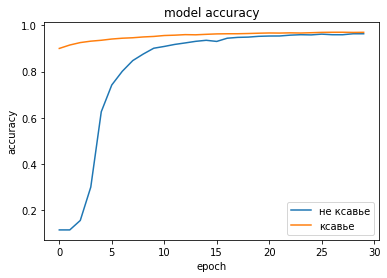

In [15]:
plt.plot(history.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['не ксавье', 'ксавье'], loc='lower right')
plt.show()